In [1]:
def coeff():
    for i in range(1,n):
        for j in range(1,m):
            A[i,j]=2.0*(1/(h*h)+1/(r[i]*r[i]*(k*k)))
            B[i,j]=(1/(h*h))+(2/(h*r[i]))
            C[i,j]=(1/(h*h))-(2/(h*r[i]))
            D[i,j]=(1/(r[i]*r[i]*(k*k)))+(cot(theta[j])/(r[i]*r[i]*k))
            E[i,j]=(1/(r[i]*r[i]*(k*k)))-(cot(theta[j])/(r[i]*r[i]*k))

In [2]:
def gauss():
    for k1 in range(1,p):
        for i in range(1,n):
            for j in range(1,m):
                U[i,j]=(B[i,j]*U[i+1,j]+C[i,j]*U[i-1,j]+D[i,j]*U[i,j+1]+E[i,j]*U[i,j-1])/A[i,j]

h= 0.4
k= 0.3141592653589793
r= [0.  0.4 0.8 1.2 1.6 2. ]
theta= [0.         0.31415927 0.62831853 0.9424778  1.25663706 1.57079633]
iterations= 15


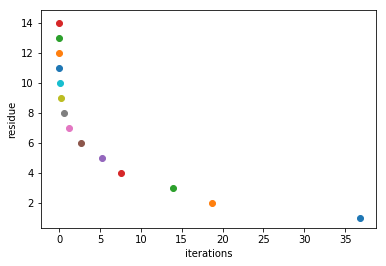

solution converge 
[[ 0.          0.          0.          0.          0.          0.        ]
 [ 0.         21.55233558 19.0443188  14.33869994  7.7830056   0.        ]
 [ 0.         33.44058239 30.65355441 24.48889799 14.27703353  0.        ]
 [ 0.         41.78594232 39.83372486 34.34890934 22.59159082  0.        ]
 [ 0.         46.98343865 46.22812971 43.21617106 33.94113848  0.        ]
 [50.         50.         50.         50.         50.         50.        ]]
r = 0.0
theta	u_numeric
0.000000 0.000000
0.314159 0.000000
0.628319 0.000000
0.942478 0.000000
1.256637 0.000000
1.570796 0.000000
r = 0.4
theta	u_numeric
0.000000 0.000000
0.314159 21.552336
0.628319 19.044319
0.942478 14.338700
1.256637 7.783006
1.570796 0.000000
r = 0.8
theta	u_numeric
0.000000 0.000000
0.314159 33.440582
0.628319 30.653554
0.942478 24.488898
1.256637 14.277034
1.570796 0.000000
r = 1.2000000000000002
theta	u_numeric
0.000000 0.000000
0.314159 41.785942
0.628319 39.833725
0.942478 34.348909
1.256637 22.5

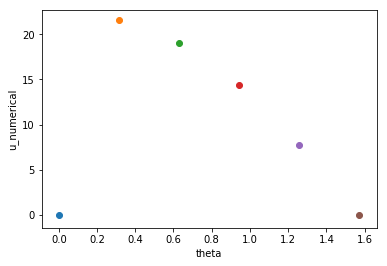

In [5]:
def main():
    import numpy as np
    from mpmath import cot
    from numpy import sin , pi, sinh
    import seaborn as sns
    from numpy import sin , pi, sinh
    import matplotlib.pyplot as plt
    from mpl_toolkits import mplot3d
    global A,B,C,D,E,U,U1,n,m,p,p1,h,k,r,cot,theta
    n=5
    m=5
    p=3
    c=2.0
    theta=pi/2
    h=c/n
    print("h=",h)#delta r
    k=theta/m
    print("k=",k)#delta theta
    r0=0
    theta0=0
    p1=100
    eps=0.001
    A=np.zeros((n,m))
    B=np.zeros((n,m))
    C=np.zeros((n,m))
    D=np.zeros((n,m))
    E=np.zeros((n,m))
    U=np.zeros((n+1,m+1))
    r=np.zeros(n+1) 
    theta=np.zeros(m+1)
    U1=np.zeros((n+1,m+1))
    R=np.zeros((p1))
    r[0]=r0
    for i in range(1,n+1):
        r[i]=r[i-1]+h
    print("r=",r)
    theta[0]=theta0
    for j in range(1,m+1):
        theta[j]=theta[j-1]+k
    print("theta=",theta)    
    
    for i in range(0,n+1):
        U[i,0]=0
        U[i,m]=0
    for j in range(0,m+1):
        U[n,j]=50
        U[0,j]=0
    #print("u=",U)
    coeff()
    for k2 in range(1,p1):
        for i in range(0,n+1):
            for j in range(0,m+1):
                U1[i,j]=U[i,j]
        gauss()
        max1=0
        flag=0
        for i in range(1,n):
            for j in range(1,m):
                max2=abs(U[i,j]-U1[i,j])
                if(max2>max1):
                    max1=max2
        R[k2]=max1
        #print("max1=",max1)
        if(max1<eps):
            #print("max1=",max1)
            flag=1
            break
    print("iterations=",k2)
    for i in range(1,k2):
        #print(R[i],i)
        plt.scatter(R[i],i)
        plt.xlabel("iterations")
        plt.ylabel("residue")
        #plt.ylim([0,300])
        #plt.xlim([-1,5])
    plt.show()
    if flag==1:
        print("solution converge ")
    else:
        print("max1,iter=",max1,k2)

    
    print(U)
   
    for i in range(0,n+1):
        r=(i*h)
        print ('r =',r)
        print("theta\tu_numeric")
        for j in range(0,m+1):
            #u_exact=((300.0/pi)*((sin(pi)*x[i])*(sinh(pi)*y[j])))/sinh(pi)
            print('{0:1f} {1:2f}'.format(theta[j], U[i,j]))
            
    for i in range(0,n+1):
        for j in range(0,m+1):
            if(i==1.0):
                plt.scatter(theta[j],U[i,j])
                plt.xlabel("theta")
                plt.ylabel("u_numerical")
    plt.show()
main()